# Classifier Diagnostics

Task: plot a confusion matrix, find images that were misclassified

## Setup

You do not need to read or modify the code in this section to successfully complete this assignment.

In [10]:
# Import fastai code.
from fastai.vision.all import *

# Set a seed for reproducibility.
set_seed(0, reproducible=True)

### Set up the dataset

In [11]:
path = untar_data(URLs.PETS)/'images'
image_files = get_image_files(path).sorted()
def cat_or_dog(filename):
    # Cat images have filenames that start with a capital letter.
    return 'cat' if filename[0].isupper() else 'dog'
labels = [cat_or_dog(path.name) for path in image_files]

### Train the classifier

In [12]:
dataloaders = ImageDataLoaders.from_lists(
    path=path, fnames=image_files, labels=labels,
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224)
)

In [13]:
learn = vision_learner(
    dls=dataloaders,
    arch=resnet18,
    metrics=accuracy
)
learn.fine_tune(epochs=1)

epoch,train_loss,valid_loss,accuracy,time
0,0.170331,0.029591,0.988498,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.065506,0.022286,0.995940,00:14


## Task

We've given you a classifier (the `learn` object). It makes a few mistakes; can you find them?

Follow these steps:

1. Show one batch from each of the training and validation sets. (Find the `DataLoader` objects at `dataloaders.train` and `dataloaders.valid`; each of them has a `.show_batch()` method.)

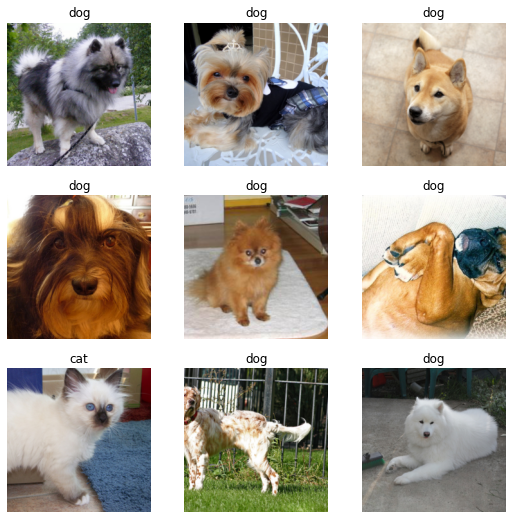

In [14]:
# your code here

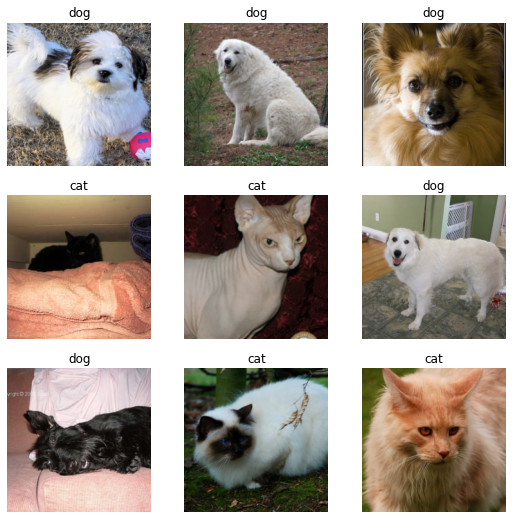

In [15]:
# your code here

2. Show the images with the highest losses. Be sure you can explain *why* some of these images have a loss even though they are classified correctly.

In [16]:
interp = ClassificationInterpretation.from_learner(learn)


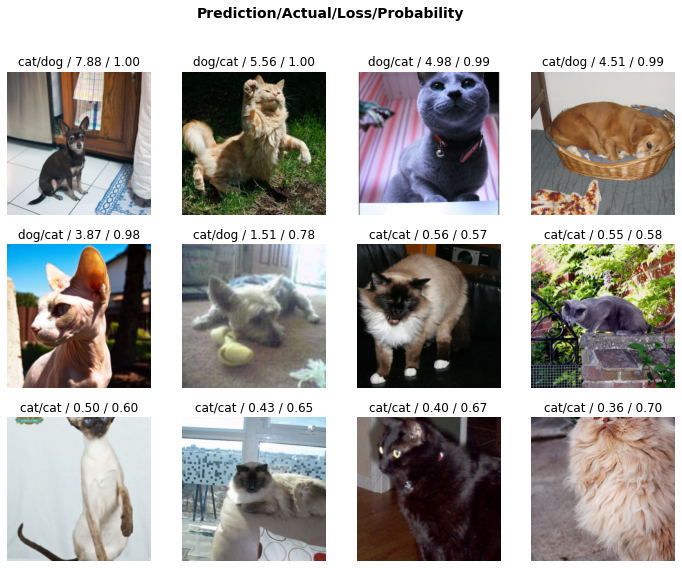

In [17]:
interp.plot_top_losses(12)

2. Look at the confusion matrix below. Compute, by hand, the *number of misclassified images*, the *accuracy*, and *error rate* of the classifier. Show your work. Check if it matches the last accuracy figure reported while training above.

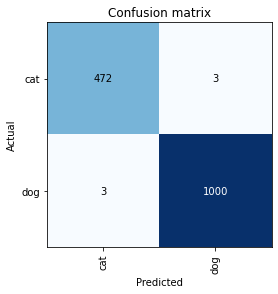

In [18]:
interp.plot_confusion_matrix()

In [19]:
# your code here

4. Compute the accuracy on the *training* set. (Since "dataset 0" is the training set and "dataset 1" is the validation set, we can use `interp_train = ClassificationInterpretation.from_learner(learn, ds_idx=0)`)

In [ ]:
interp_train = ClassificationInterpretation.from_learner(learn, ds_idx=0)
# your code here

## Analysis

1. **How many dogs in the validation set were misclassified as cats? Vice versa?**

X out of XX images were incorrectly labeled "cat".

Y out of YY images were incorrectly labeled "dog".

2. **If we had only looked at the accuracy on the training set, would we have *overestimated* or *underestimated* how well the classifier would have performed on the validation set? By how much?**

*your answer here*

3. Examine the top losses plot.
  1. Explain what the four things above each image mean.
  2. Explain why some correctly classified images appear in the "top losses".
  3. What is the relationship between "loss" and "probability"?

*your answer here*